<a href="https://colab.research.google.com/github/Fevzierenn/Reddit-Post-Popularity-Classification-DeepLearning/blob/main/redditPopularityDL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [584]:
import pandas as pd
import time


In [585]:

df = pd.read_csv('/content/reddit_posts.csv')

In [586]:
df.head()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit
0,1nqkw5r,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1758839988,False,NaN,technology
1,1nqebg2,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1758824340,False,NaN,technology
2,1nqigyn,Trump signs executive order to transfer TikTok...,5291,0.94,659,1758833956,False,NaN,technology
3,1nqnqno,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,1758847837,False,NaN,technology
4,1nqmb8m,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,1758843779,False,NaN,technology


In [587]:
df.tail()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit
4986,1nhh4nf,I will never understand the slander behind Inc...,0,0.15,7,1757928337,True,"With Incredibles 3 announced, it sparked up di...",movies
4987,1nfv9yv,Did John Ottoman win the Oscar for Bohemian Rh...,220,0.81,86,1757763462,True,In 2019 Bohemian Rhapsody's John Ottman won th...,movies
4988,1ngwb2r,A mixture of Charlie Kaufman and PTA! Suggesti...,0,0.44,4,1757868611,True,"Films like Synecdoche New York, The Master and...",movies
4989,1ng2fz7,"The Night Before The Battle, The Soldiers Sing...",77,0.82,11,1757782270,False,NaN,movies
4990,1nh6p8c,Saw movies,0,0.44,7,1757893726,True,Where can I watch the saw movies? I can’t find...,movies


In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4991 non-null   object 
 1   title         4991 non-null   object 
 2   score         4991 non-null   int64  
 3   upvote_ratio  4991 non-null   float64
 4   num_comments  4991 non-null   int64  
 5   created_utc   4991 non-null   int64  
 6   is_self       4991 non-null   bool   
 7   selftext      918 non-null    object 
 8   subreddit     4991 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(4)
memory usage: 316.9+ KB


In [589]:
display(df.describe(include="object"))

,id,title,selftext,subreddit
count,4991,4991,918,4991
unique,4991,4969,918,5
top,1nh6p8c,Microsoft blocks Israel’s use of its technolog...,Where can I watch the saw movies? I can’t find...,movies
freq,1,2,1,1000


In [590]:
display(df.describe(include=["int","float"]))

,score,upvote_ratio,num_comments,created_utc
count,4991.000000,4991.000000,4991.000000,4.991000e+03
mean,3490.023843,0.794388,194.077740,1.757442e+09
std,9497.997117,0.227555,674.891186,1.487251e+06
min,0.000000,0.040000,0.000000,1.692927e+09
25%,19.000000,0.700000,7.000000,1.756595e+09
50%,304.000000,0.910000,34.000000,1.757880e+09
75%,2242.500000,0.960000,146.000000,1.758375e+09
max,123894.000000,1.000000,25992.000000,1.758878e+09


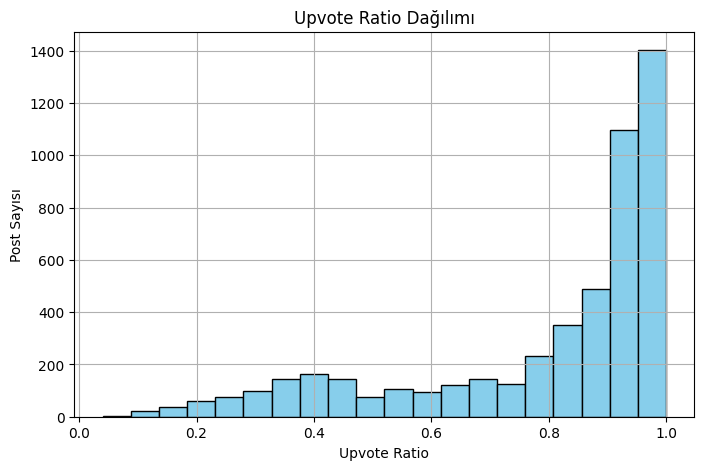

In [591]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['upvote_ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Upvote Ratio Dağılımı')
plt.xlabel('Upvote Ratio')
plt.ylabel('Post Sayısı')
plt.grid(True)
plt.show()


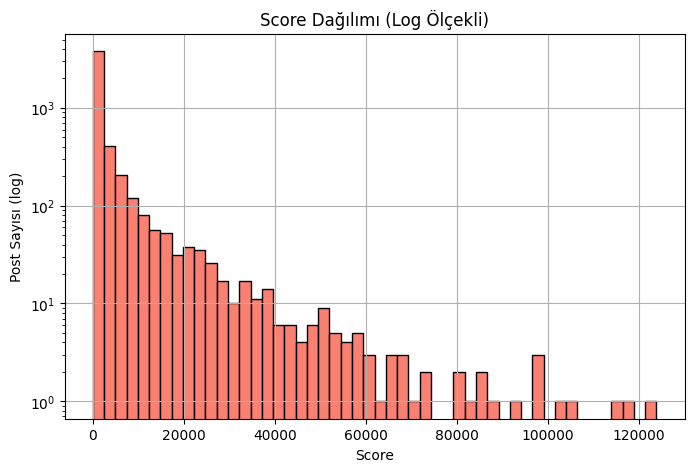

In [592]:
plt.figure(figsize=(8, 5))
plt.hist(df['score'], bins=50, color='salmon', edgecolor='black', log=True)
plt.title('Score Dağılımı (Log Ölçekli)')
plt.xlabel('Score')
plt.ylabel('Post Sayısı (log)')
plt.grid(True)
plt.show()


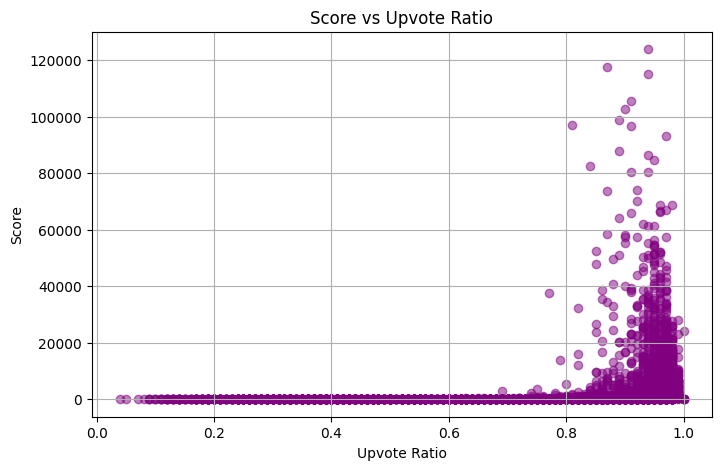

In [593]:
plt.figure(figsize=(8, 5))
plt.scatter(df['upvote_ratio'], df['score'], alpha=0.5, color='purple')
plt.title('Score vs Upvote Ratio')
plt.xlabel('Upvote Ratio')
plt.ylabel('Score')
plt.grid(True)
plt.show()


Classifying each post according to score, upvote ratio, and number of comments

In [594]:
def label_popularity(row):
    if row['score'] > 3000 and row['upvote_ratio'] > 0.8 and row['num_comments'] > 150:
        return 'viral'
    elif row['score'] < 100 or row['num_comments'] < 20:
        return 'not_popular'
    else:
        return 'popular'

df['popularity_level'] = df.apply(label_popularity, axis=1)


create column as popularity_level represents as unpopular - popular - viral -> This will be our dependent variable

In [595]:
df['popularity_level'] = df.apply(label_popularity, axis=1)
df.head()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit,popularity_level
0,1nqkw5r,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1758839988,False,NaN,technology,viral
1,1nqebg2,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1758824340,False,NaN,technology,viral
2,1nqigyn,Trump signs executive order to transfer TikTok...,5291,0.94,659,1758833956,False,NaN,technology,viral
3,1nqnqno,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,1758847837,False,NaN,technology,popular
4,1nqmb8m,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,1758843779,False,NaN,technology,popular


In [596]:
print(df['popularity_level'].value_counts())


popularity_level
not_popular    2450
popular        1690
viral           851
Name: count, dtype: int64


drop useless columns and seperate Y (popularity_level)
And create df2 to and keep df original form

In [597]:
y = df['popularity_level']
df2 = df.drop(columns=['id','is_self','selftext' , 'popularity_level'])
df2.head(2)

,title,score,upvote_ratio,num_comments,created_utc,subreddit
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1758839988,technology
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1758824340,technology


In [598]:
import pandas as pd

# adjust date type
df2['created_utc'] = pd.to_datetime(df2['created_utc'], unit='s')

# title length
df2['title_length'] = df2['title'].apply(len)

# score per comment
df2['score_per_comment'] = df2['score'] / (df['num_comments'] + 1)

# post time
df2['hour'] = df2['created_utc'].dt.hour

# is it weekend?
df2['is_weekend'] = df2['created_utc'].dt.dayofweek >= 5


In [599]:
df2.head(2)

,title,score,upvote_ratio,num_comments,created_utc,subreddit,title_length,score_per_comment,hour,is_weekend
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,2025-09-25 22:39:48,technology,100,31.498024,22,False
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,2025-09-25 18:19:00,technology,65,9.300674,18,False


Make strings useful and delete stepwords

In [600]:

import re
import nltk

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


before adjustment on Strings

In [601]:
title = df2['title']
title.head(2)

,title
0,Alex Jones and Nick Fuentes taken off YouTube ...
1,"Regulating AI hastens the Antichrist, says Pal..."


After adjustment. All words are root form.

In [602]:
titles = []
for m in range(0, len(title)):
    singleTitle =re.sub('[^a-zA-Z]',' ', title[m])
    singleTitle=singleTitle.lower()
    titleList = singleTitle.split()
    titleList = [ps.stem(word) for word in titleList if not word in set(stopwords.words("english"))]
    titleWord = ' '.join(titleList)
    titles.append(titleWord)
print(titles[2])

trump sign execut order transfer tiktok us owner


***Feautre Extraction ( Öznitelik Çıkarımı) & Bag of Words (BOW)***  -> counts how many times a word occurs.

CountVectorizer -> vector

In [603]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
titleVectors = cv.fit_transform(titles).toarray() # bağımsız değişken


now all the titles represents as vector.

In [604]:
print(titleVectors[0])

[0 0 0 ... 0 1 0]


y -> convert to numerical values with using LabelEncoder

In [605]:
y.head(1)


,popularity_level
0,viral


In [606]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)


Now, Y represents numerical and y is numpy array now.

In [607]:
print(y)

[2 2 2 ... 0 0 0]


In [608]:
title_vec_df = pd.DataFrame(titleVectors, columns=cv.get_feature_names_out())

titles are now represented in vector space according to the frequency of use of words


In [609]:
title_vec_df.head(3)

,abc,abil,abort,abus,academ,academi,acceler,access,accid,accord,...,wrong,ye,year,yet,york,young,younger,youth,youtub,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Make subreddit and is_weekend columns numerical

In [610]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['subreddit'] = le.fit_transform(df2['subreddit'])
df2['is_weekend'] = le.fit_transform(df2['is_weekend'])

In [611]:
df2.head(3)

,title,score,upvote_ratio,num_comments,created_utc,subreddit,title_length,score_per_comment,hour,is_weekend
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,2025-09-25 22:39:48,4,100,31.498024,22,0
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,2025-09-25 18:19:00,4,65,9.300674,18,0
2,Trump signs executive order to transfer TikTok...,5291,0.94,659,2025-09-25 20:59:16,4,59,8.016667,20,0


Drop useless columns once again.

In [612]:
df2 = df2.drop(columns=['title','created_utc'])
df2.head(2)

,score,upvote_ratio,num_comments,subreddit,title_length,score_per_comment,hour,is_weekend
0,31876,0.95,1011,4,100,31.498024,22,0
1,15188,0.93,1632,4,65,9.300674,18,0


We perform the scale operation to transform the data so that their mean is 0 and their standard deviation is 1. **(X independent variable)**

In [613]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = sc.fit_transform(df2)

concat title vector df & remain X df

In [614]:
import numpy as np
X = np.hstack((title_vec_df, df2))  # Final feature matrix

Split data -> train and test

In [615]:
from sklearn.model_selection import train_test_split

In [616]:
# 1. İlk olarak train/test ayır
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)
# 2. Sonra train seti içinden validation ayır
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)


Let's watch the behavior of the data in Logistic regression

In [617]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [618]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Validation set üzerinde tahmin
lr_pred = lr.predict(X_val)

# Doğru eşleşme: X_val → y_val
acc = accuracy_score(y_val, lr_pred)
print(f"Validation Accuracy: {acc:.4f}")

Validation Accuracy: 0.8686


In [619]:
lr_test_pred = lr.predict(X_test)
test_acc = accuracy_score(y_test, lr_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8619


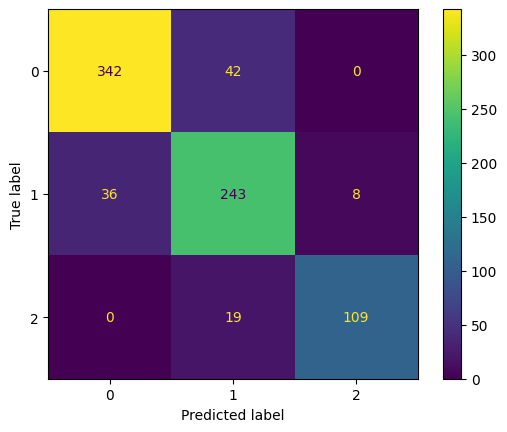

In [620]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Validation tahminleri
lr_pred_val = lr.predict(X_val)

# Confusion matrix: y_val ile eşleşmeli
cm = confusion_matrix(y_val, lr_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


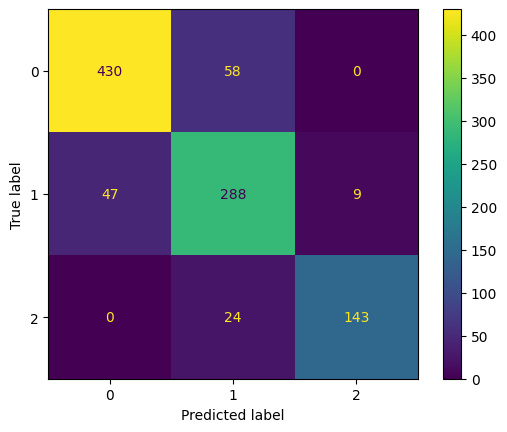

In [621]:
#Test tahminleri
lr_pred_test = lr.predict(X_test)
cm_test = confusion_matrix(y_test, lr_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()


In [622]:
from sklearn.metrics import classification_report

# Validation tahminleri
lr_pred_val = lr.predict(X_val)

# Doğru eşleşme: X_val → y_val
print(classification_report(y_val, lr_pred_val, digits=4))



              precision    recall  f1-score   support

           0     0.9048    0.8906    0.8976       384
           1     0.7993    0.8467    0.8223       287
           2     0.9316    0.8516    0.8898       128

    accuracy                         0.8686       799
   macro avg     0.8786    0.8630    0.8699       799
weighted avg     0.8712    0.8686    0.8693       799



In [623]:
#Test tahminleri
lr_pred_test = lr.predict(X_test)
print(classification_report(y_test, lr_pred_test, digits=4))

              precision    recall  f1-score   support

           0     0.9015    0.8811    0.8912       488
           1     0.7784    0.8372    0.8067       344
           2     0.9408    0.8563    0.8966       167

    accuracy                         0.8619       999
   macro avg     0.8735    0.8582    0.8648       999
weighted avg     0.8657    0.8619    0.8630       999



Perform all the models we can and see what our data behaviour.

In [624]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Veri setini train/val/test olarak ayır
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

# 2. Modelleri tanımla
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(max_depth=10, random_state=0),
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42),
    "SVC": SVC(kernel='rbf', C=1.0),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# 3. Validation accuracy'leri topla
val_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_pred_val)
    val_results[name] = acc_val

# 4. Sonuçları yazdır
print("📊 Validation Accuracy Scores:")
for name, acc in sorted(val_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: Accuracy = {acc:.4f}")


📊 Validation Accuracy Scores:
Decision Tree: Accuracy = 0.9987
Logistic Regression: Accuracy = 0.8686
SVC: Accuracy = 0.8623
Random Forest: Accuracy = 0.8298
KNN: Accuracy = 0.7109
Naive Bayes: Accuracy = 0.3980


In [625]:
# Test accuracy'leri topla
test_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    test_results[name] = acc_test

print("\n🧪 Test Accuracy Scores:")
for name, acc in sorted(test_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: Accuracy = {acc:.4f}")



🧪 Test Accuracy Scores:
Decision Tree: Accuracy = 0.9990
Logistic Regression: Accuracy = 0.8619
SVC: Accuracy = 0.8519
Random Forest: Accuracy = 0.8318
KNN: Accuracy = 0.6917
Naive Bayes: Accuracy = 0.3604


## **Train data with BERT**

In [626]:

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertModel
from sklearn.metrics import accuracy_score, classification_report

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


In [627]:
# =======================
# Dataset
# =======================
class RedditDataset(Dataset):
    def __init__(self, titles, nums, labels, tokenizer, max_len=64):
        self.titles = titles      # list or array
        self.nums = nums.astype("float32")   # numeric array
        self.labels = labels.astype("int64") # label array
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        enc = self.tokenizer(
            str(self.titles[idx]),
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": enc["input_ids"].squeeze(0),
            "attention_mask": enc["attention_mask"].squeeze(0),
            "nums": torch.tensor(self.nums[idx], dtype=torch.float),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

In [628]:
# =======================
# Model
# =======================
class BertWithNumeric(nn.Module):
    def __init__(self, num_numeric, freeze_bert=True):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        if freeze_bert:
            for p in self.bert.parameters():
                p.requires_grad = False
        bert_dim = self.bert.config.hidden_size  # 768
        self.num_mlp = nn.Sequential(
            nn.Linear(num_numeric, 64),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Sequential(
            nn.Linear(bert_dim + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 3)  # 3 sınıf
        )

    def forward(self, input_ids, attention_mask, nums):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = out.last_hidden_state[:,0,:]  # CLS token embedding
        nums_out = self.num_mlp(nums)
        concat = torch.cat([pooled, nums_out], dim=1)
        return self.classifier(concat)

In [629]:
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast
from torch.utils.data import DataLoader

# Tokenizer ve sabitler
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
MAX_LEN = 64

# =======================
# 1. Train / Val / Test Ayrımı
# =======================

# İlk olarak train/test ayır
x_train_full, x_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Ardından train/val ayır
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# =======================
# 2. Title ve Numeric Ayır
# =======================

titles_train = x_train[:, 0:-8]
nums_train   = x_train[:, 2000:]

titles_val   = x_val[:, 0:-8]
nums_val     = x_val[:, 2000:]

titles_test  = x_test[:, 0:-8]
nums_test    = x_test[:, 2000:]

# =======================
# 3. Dataset & DataLoader
# =======================

train_ds = RedditDataset(titles_train, nums_train, y_train, tokenizer, max_len=MAX_LEN)
val_ds   = RedditDataset(titles_val,   nums_val,   y_val,   tokenizer, max_len=MAX_LEN)
test_ds  = RedditDataset(titles_test,  nums_test,  y_test,  tokenizer, max_len=MAX_LEN)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=32, shuffle=False)


In [630]:

print(titles_train.shape)

(3193, 2000)


In [631]:
# Model
model = BertWithNumeric(num_numeric=nums_train.shape[1], freeze_bert=True).to(DEVICE)

# Optimizer & Loss
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-4)
loss_fn = nn.CrossEntropyLoss()

In [632]:
train_losses = []
val_losses = []
val_accuracies = []
EPOCHS = 300

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(ids, mask, nums)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    # 🔍 Validation
    model.eval()
    val_preds, val_trues = [], []
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            ids = batch["input_ids"].to(DEVICE)
            mask = batch["attention_mask"].to(DEVICE)
            nums = batch["nums"].to(DEVICE)
            labels = batch["labels"].to(DEVICE)

            logits = model(ids, mask, nums)
            loss = loss_fn(logits, labels)
            val_loss += loss.item()

            p = logits.argmax(dim=1).cpu().numpy()
            val_preds.extend(p)
            val_trues.extend(labels.cpu().numpy())

    val_loss /= len(val_loader)
    val_acc = accuracy_score(val_trues, val_preds)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {avg_loss:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f}")


# 🧠 Ekstra: classification report (validation)
val_report = classification_report(val_trues, val_preds, digits=4)
print("📄 Val Classification Report:")
print(val_report)


Epoch 1/300 - Train Loss: 0.9423 - Val Loss: 0.8101 - Val Acc: 0.6809
Epoch 2/300 - Train Loss: 0.7285 - Val Loss: 0.6009 - Val Acc: 0.7509
Epoch 3/300 - Train Loss: 0.5917 - Val Loss: 0.4915 - Val Acc: 0.7935
Epoch 4/300 - Train Loss: 0.5013 - Val Loss: 0.4348 - Val Acc: 0.8198
Epoch 5/300 - Train Loss: 0.4506 - Val Loss: 0.3895 - Val Acc: 0.8473
Epoch 6/300 - Train Loss: 0.4184 - Val Loss: 0.3612 - Val Acc: 0.8498
Epoch 7/300 - Train Loss: 0.3924 - Val Loss: 0.3390 - Val Acc: 0.8548
Epoch 8/300 - Train Loss: 0.3737 - Val Loss: 0.3251 - Val Acc: 0.8698
Epoch 9/300 - Train Loss: 0.3579 - Val Loss: 0.3119 - Val Acc: 0.8748
Epoch 10/300 - Train Loss: 0.3530 - Val Loss: 0.3180 - Val Acc: 0.8698
Epoch 11/300 - Train Loss: 0.3440 - Val Loss: 0.2943 - Val Acc: 0.8698
Epoch 12/300 - Train Loss: 0.3377 - Val Loss: 0.2934 - Val Acc: 0.8773
Epoch 13/300 - Train Loss: 0.3179 - Val Loss: 0.2751 - Val Acc: 0.8811
Epoch 14/300 - Train Loss: 0.3180 - Val Loss: 0.2747 - Val Acc: 0.8761
Epoch 15/300 - 

In [641]:
# 🔍 Final Test Evaluation
model.eval()
test_preds, test_trues = [], []
with torch.no_grad():
    for batch in test_loader:
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(ids, mask, nums)
        p = logits.argmax(dim=1).cpu().numpy()
        test_preds.extend(p)
        test_trues.extend(labels.cpu().numpy())

test_acc = accuracy_score(test_trues, test_preds)
print(f"\n📊 Final Test Accuracy: {test_acc:.4f}")
print("\nFinal Classification Report:")
print(classification_report(test_trues, test_preds, digits=4))



📊 Final Test Accuracy: 0.9630

Final Classification Report:
              precision    recall  f1-score   support

           0     0.9728    0.9627    0.9677       483
           1     0.9449    0.9477    0.9463       344
           2     0.9716    0.9942    0.9828       172

    accuracy                         0.9630       999
   macro avg     0.9631    0.9682    0.9656       999
weighted avg     0.9630    0.9630    0.9629       999



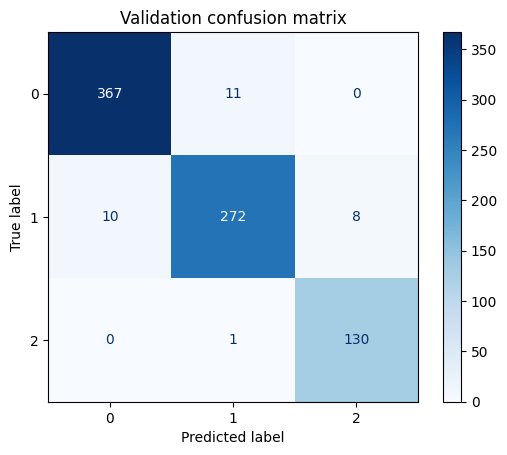

In [642]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix hesapla
cm = confusion_matrix(val_trues, val_preds)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")  # Renk skalası daha net görünür
plt.title("Validation confusion matrix")
plt.show()


Text(0.5, 1.0, 'test confusion matrix')

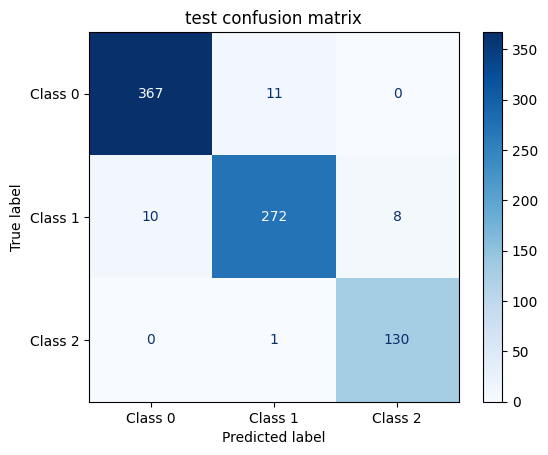

In [643]:
cm_test = confusion_matrix(test_trues, test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap="Blues")
plt.title("test confusion matrix")



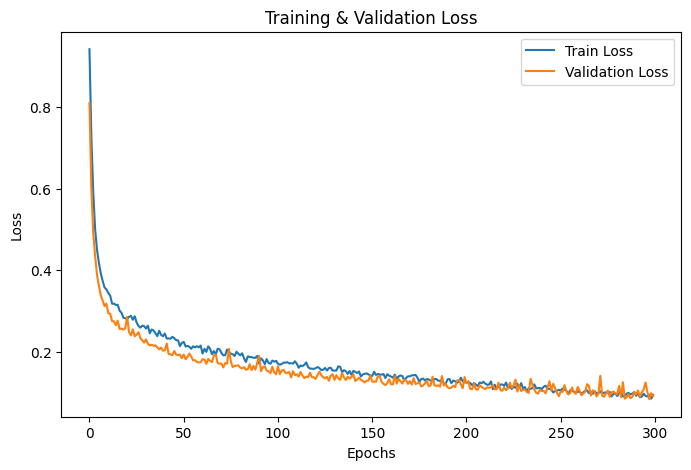

In [636]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


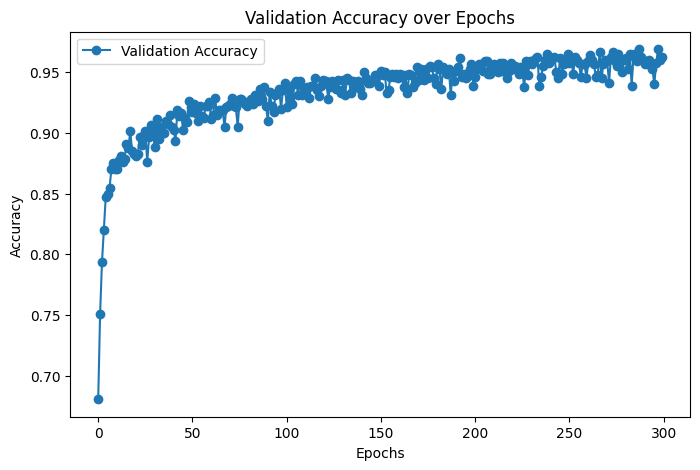

In [637]:
plt.figure(figsize=(8,5))
plt.plot(val_accuracies, marker="o", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()
plt.show()


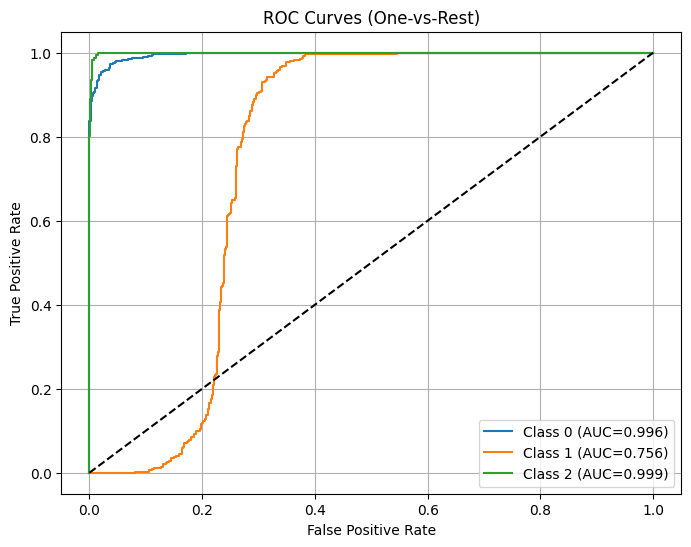

In [638]:
# @title
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Model tahminleri (logitleri) validation set için alalım
model.eval()
all_logits, all_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].cpu().numpy()

        logits = model(ids, mask, nums).cpu().numpy()
        all_logits.append(logits)
        all_labels.append(labels)

all_logits = np.vstack(all_logits)   # shape: (N, num_classes)
all_labels = np.hstack(all_labels)   # shape: (N,)

# Label’leri one-hot’a çevir (multi-class ROC için)
n_classes = all_logits.shape[1]
y_true_bin = label_binarize(all_labels, classes=np.arange(n_classes))

# ROC curve
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_logits[:, i])
    auc = roc_auc_score(y_true_bin[:, i], all_logits[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc:.3f})")

# Random guess çizgisi
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()


In [639]:
model.eval()  # Modeli değerlendirme moduna al

test_preds, test_trues = [], []

with torch.no_grad():
    for batch in test_loader:
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(ids, mask, nums)
        p = logits.argmax(dim=1).cpu().numpy()
        test_preds.extend(p)
        test_trues.extend(labels.cpu().numpy())


In [640]:
from sklearn.metrics import accuracy_score, classification_report




print("\nClassification Report (Test Set):")
print(classification_report(test_trues, test_preds, digits=4))



Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.9728    0.9627    0.9677       483
           1     0.9449    0.9477    0.9463       344
           2     0.9716    0.9942    0.9828       172

    accuracy                         0.9630       999
   macro avg     0.9631    0.9682    0.9656       999
weighted avg     0.9630    0.9630    0.9629       999

